In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
def Print_unique_values(df):                                 #checking for unique values
    for i in df:
        if df[i].dtype=='O':
            print(format(i),":",df[i].unique())

In [6]:
Print_unique_values(df)  

name : ['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission : ['Manual' 'Automatic']
owner : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [7]:
df.isnull().sum()                                           #checking for null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [10]:
final_dataset=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [11]:
final_dataset

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [12]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [13]:
#Converting string values of columns to numeric
convert_to_nums={
    "owner":{"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3,"Test Drive Car":4},
    "fuel":{"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4},
    "seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2},
    "transmission":{"Manual":0,"Automatic":1}
}

In [14]:
final_dataset=final_dataset.replace(convert_to_nums)

In [15]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


In [16]:
final_dataset.owner.dtypes

dtype('int64')

In [17]:
final_dataset["Age_of_car"]=2021-df['year']

In [18]:
final_dataset.drop('year',axis=1,inplace=True)

In [19]:
final_dataset

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age_of_car
0,60000,70000,0,0,0,0,14
1,135000,50000,0,0,0,0,14
2,600000,100000,1,0,0,0,9
3,250000,46000,0,0,0,0,4
4,450000,141000,1,0,0,1,7
...,...,...,...,...,...,...,...
4335,409999,80000,1,0,0,1,7
4336,409999,80000,1,0,0,1,7
4337,110000,83000,0,0,0,1,12
4338,865000,90000,1,0,0,0,5


In [20]:
final_dataset.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age_of_car
selling_price,1.000000,-0.192289,0.226883,0.240666,0.530205,-0.198833,-0.413922
km_driven,-0.192289,1.000000,0.274760,-0.187131,-0.120226,0.274409,0.419688
fuel,0.226883,0.274760,1.000000,0.011358,0.027507,0.015318,-0.090388
seller_type,0.240666,-0.187131,0.011358,1.000000,0.200191,-0.211115,-0.182458
transmission,0.530205,-0.120226,0.027507,0.200191,1.000000,-0.083924,-0.143800
owner,-0.198833,0.274409,0.015318,-0.211115,-0.083924,1.000000,0.410448
Age_of_car,-0.413922,0.419688,-0.090388,-0.182458,-0.143800,0.410448,1.000000


In [21]:
import seaborn as sns

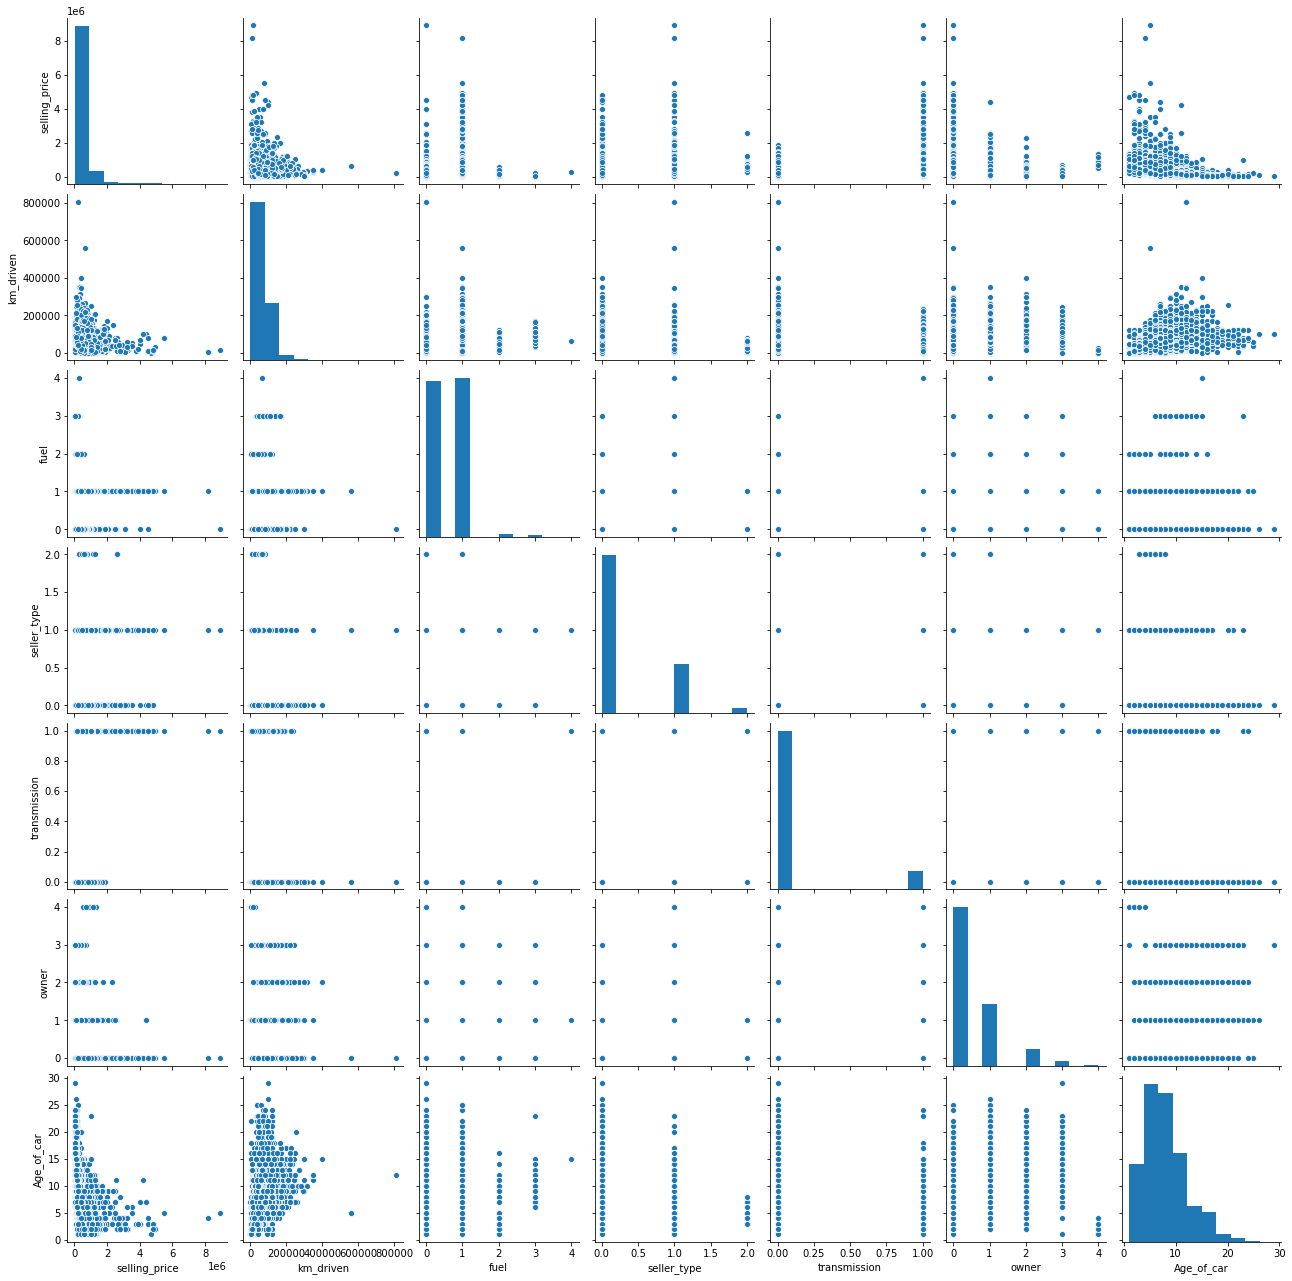

In [22]:
sns.pairplot(final_dataset)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

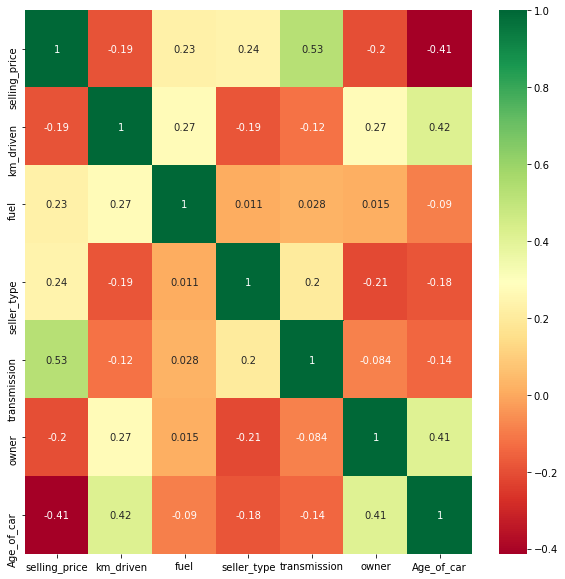

In [24]:
cormat=final_dataset.corr()
top_corr=cormat.index
plt.figure(figsize=(10,10))
sns.heatmap(final_dataset[top_corr].corr(),annot=True,cmap='RdYlGn')

In [25]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,Age_of_car
0,60000,70000,0,0,0,0,14
1,135000,50000,0,0,0,0,14
2,600000,100000,1,0,0,0,9
3,250000,46000,0,0,0,0,4
4,450000,141000,1,0,0,1,7


In [26]:
X=final_dataset.iloc[:,1:]

In [27]:
Y=final_dataset.iloc[:,0]

In [28]:
X

,km_driven,fuel,seller_type,transmission,owner,Age_of_car
0,70000,0,0,0,0,14
1,50000,0,0,0,0,14
2,100000,1,0,0,0,9
3,46000,0,0,0,0,4
4,141000,1,0,0,1,7
...,...,...,...,...,...,...
4335,80000,1,0,0,1,7
4336,80000,1,0,0,1,7
4337,83000,0,0,0,1,12
4338,90000,1,0,0,0,5


In [29]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[0.24214097 0.13907361 0.05660476 0.2928318  0.02875163 0.24059722]


In [31]:
X.columns

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'Age_of_car'],
      dtype='object')

In [32]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)

In [33]:
feat_importance

km_driven       0.242141
fuel            0.139074
seller_type     0.056605
transmission    0.292832
owner           0.028752
Age_of_car      0.240597
dtype: float64

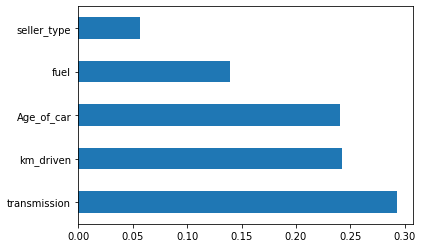

In [34]:
feat_importance.nlargest(5).plot(kind='barh')

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [36]:
x_train

,km_driven,fuel,seller_type,transmission,owner,Age_of_car
1523,50000,0,0,0,0,4
1368,143000,0,0,0,2,14
2967,70000,0,0,0,1,11
3496,5000,1,0,0,0,5
3434,110000,0,0,0,0,14
...,...,...,...,...,...,...
4292,110000,1,0,0,0,9
3520,80000,0,0,0,0,3
710,32670,0,1,1,0,4
3925,80000,0,0,0,0,7


In [37]:
x_test

,km_driven,fuel,seller_type,transmission,owner,Age_of_car
1602,52536,0,0,0,0,12
4027,120000,1,0,0,0,7
214,115962,1,0,0,1,5
3684,4000,0,0,0,0,3
523,50000,0,0,0,0,10
...,...,...,...,...,...,...
2197,170000,1,0,1,2,12
3196,20778,0,1,0,0,9
1178,8500,0,0,0,0,3
616,7104,0,2,0,0,5


In [38]:
y_train

1523     500000
1368     100000
2967     300000
3496    1290000
3434     100000
         ...   
4292     300000
3520     420000
710      415000
3925     320000
3017     134000
Name: selling_price, Length: 3038, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestRegressor


In [40]:
regressor=RandomForestRegressor()

In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [42]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [43]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
rf_random=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [45]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [47]:
rf_random.best_score_

-124730009081.8584

In [48]:
predictions=rf_random.predict(x_test)

In [49]:
predictions[:5]

array([199837.02937183, 386873.59850559, 539085.11329243, 503054.52032543,
       216636.8584341 ])

In [50]:
y_test[:5]

1602    199000
4027    580000
214     450000
3684    360000
523     135000
Name: selling_price, dtype: int64

In [51]:
rf_random.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)>

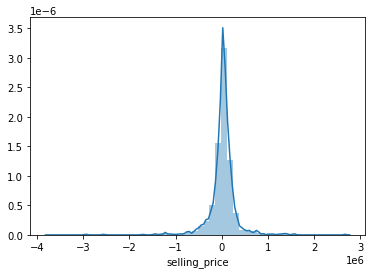

In [52]:
sns.distplot(predictions-y_test)

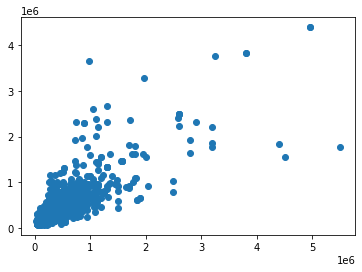

In [53]:
plt.scatter(y_test,predictions)

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 168837.86059978
MSE: 99777564164.01001
RMSE: 315875.8682837453


In [56]:
from sklearn.metrics import classification_report

In [59]:
#print(metrics.accuracy_score(y_test,predictions))